In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the VAE
class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAE, self).__init__()

        # Encoder
        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, latent_dim)  # mu
        self.fc22 = nn.Linear(400, latent_dim)  # logvar

        # Decoder
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Loss function for VAE
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Initialize and train the VAE
model = VAE().to(device)  # Move model to GPU if available
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)  # Move data to GPU if available
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch} [{batch_idx*len(data)}/{len(train_loader.dataset)}]\tLoss: {loss.item()/len(data):.6f}")

    print(f"====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}")

# Execute the training loop
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    train(epoch)

Epoch 1 [0/60000]	Loss: 548.627991
Epoch 1 [12800/60000]	Loss: 183.010162
Epoch 1 [25600/60000]	Loss: 148.953857
Epoch 1 [38400/60000]	Loss: 144.171707
Epoch 1 [51200/60000]	Loss: 123.833145
====> Epoch: 1 Average loss: 162.5451
Epoch 2 [0/60000]	Loss: 129.687225
Epoch 2 [12800/60000]	Loss: 122.840004
Epoch 2 [25600/60000]	Loss: 119.716606
Epoch 2 [38400/60000]	Loss: 120.261299
Epoch 2 [51200/60000]	Loss: 113.685913
====> Epoch: 2 Average loss: 120.5646
Epoch 3 [0/60000]	Loss: 119.375694
Epoch 3 [12800/60000]	Loss: 120.021469
Epoch 3 [25600/60000]	Loss: 114.867950
Epoch 3 [38400/60000]	Loss: 116.234314
Epoch 3 [51200/60000]	Loss: 104.831139
====> Epoch: 3 Average loss: 114.0558
Epoch 4 [0/60000]	Loss: 111.174934
Epoch 4 [12800/60000]	Loss: 109.560616
Epoch 4 [25600/60000]	Loss: 109.804512
Epoch 4 [38400/60000]	Loss: 111.486229
Epoch 4 [51200/60000]	Loss: 111.239838
====> Epoch: 4 Average loss: 111.2164
Epoch 5 [0/60000]	Loss: 110.503448
Epoch 5 [12800/60000]	Loss: 109.928200
Epoch 5 [2

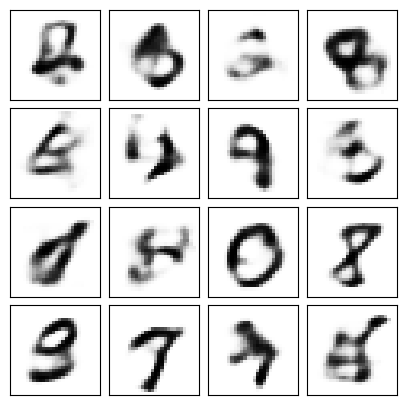

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure the model is in evaluation mode
model.eval()

# Number of samples
n_samples = 16

# Sample random points in the latent space
z = torch.randn(n_samples, 20).to(device)  # assuming latent_dim=20 as in the earlier VAE code

# Decode the latent vectors
reconstructed_images = model.decode(z)

# Convert them back to numpy for visualization
reconstructed_images = reconstructed_images.cpu().detach().numpy().reshape(n_samples, 28, 28)

# Plotting
fig, axes = plt.subplots(int(np.sqrt(n_samples)), int(np.sqrt(n_samples)), figsize=(5,5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(reconstructed_images[i], cmap='binary')

plt.show()
